In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
jobs = pd.read_csv('Dataset salary 2024.csv')
jobs.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [25]:
jobs.shape

(16534, 11)

In [26]:
jobs.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [27]:
# Check for missing values
print(jobs.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [28]:
# Summary statistics for numerical columns
jobs.describe()




,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [29]:
jobs.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [30]:
work =jobs['work_year'].value_counts()
work

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [31]:
location = jobs['company_location'].unique()
location

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [32]:
country_mapping = {
    'US': 'UnitedStates', 'AU': 'Australia', 'GB': 'UnitedKingdom', 'CA': 'Canada', 'NL': 'Netherlands',
    'LT': 'Lithuania', 'DK': 'Denmark', 'FR': 'France', 'ZA': 'SouthAfrica', 'NZ': 'NewZealand',
    'AR': 'Argentina', 'ES': 'Spain', 'KE': 'Kenya', 'LV': 'Latvia', 'IN': 'India', 'DE': 'Germany',
    'IL': 'Israel', 'FI': 'Finland', 'AT': 'Austria', 'BR': 'Brazil', 'CH': 'Switzerland', 'AE': 'UnitedArabEmirates',
    'PL': 'Poland', 'SA': 'SaudiArabia', 'UA': 'Ukraine', 'EG': 'Egypt', 'PH': 'Philippines', 'TR': 'Turkey',
    'OM': 'Oman', 'MX': 'Mexico', 'PT': 'Portugal', 'BA': 'BosniaandHerzegovina', 'IT': 'Italy', 'AS': 'AmericanSamoa',
    'IE': 'Ireland', 'EE': 'Estonia', 'MT': 'Malta', 'HU': 'Hungary', 'LB': 'Lebanon', 'RO': 'Romania', 'VN': 'Vietnam',
    'NG': 'Nigeria', 'LU': 'Luxembourg', 'GI': 'Gibraltar', 'CO': 'Colombia', 'SI': 'Slovenia', 'GR': 'Greece',
    'MU': 'Mauritius', 'RU': 'Russia', 'KR': 'SouthKorea', 'CZ': 'CzechRepublic', 'QA': 'Qatar', 'GH': 'Ghana',
    'SE': 'Sweden', 'AD': 'Andorra', 'EC': 'Ecuador', 'NO': 'Norway', 'JP': 'Japan', 'HK': 'HongKong',
    'CF': 'CentralAfricanRepublic', 'SG': 'Singapore', 'TH': 'Thailand', 'HR': 'Croatia', 'AM': 'Armenia',
    'PK': 'Pakistan', 'IR': 'Iran', 'BS': 'Bahamas', 'PR': 'PuertoRico', 'BE': 'Belgium', 'ID': 'Indonesia',
    'MY': 'Malaysia', 'HN': 'Honduras', 'DZ': 'Algeria', 'IQ': 'Iraq', 'CN': 'China', 'CL': 'Chile', 'MD': 'Moldova'
}

}

jobs['company_location'] = jobs['company_location'].map(country_mapping)


SyntaxError: unmatched '}' (1932287000.py, line 17)

In [ ]:
experience = jobs['experience_level'].unique()
experience

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
experience_level_mapping = {
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
}

jobs['experience_level'] = jobs['experience_level'].map(experience_level_mapping)


In [ ]:
title = jobs['job_title'].unique()
title

array(['AI Engineer', 'Data Engineer', 'Machine Learning Engineer',
       'ML Engineer', 'Data Analyst', 'NLP Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Manager', 'Data Architect',
       'Data Operations Manager', 'Research Scientist',
       'Data Science Manager', 'Business Intelligence Engineer',
       'Business Intelligence', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Science', 'Data Specialist',
       'Business Intelligence Lead', 'Research Analyst',
       'Business Intelligence Analyst', 'AI Software Engineer',
       'Machine Learning Scientist', 'Data Science Engineer',
       'Machine Learning Operations Engineer', 'Analytics Engineer',
       'Data Management Analyst',
       'Encounter Data Management Professional',
       'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead',
       'Research Engineer', 'AI Scientist',
       'Business Intelligence Develope

In [ ]:
job_title_mapping = {
    'AI Engineer': 'AI Engineer', 'Data Engineer': 'Data Engineer',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'ML Engineer': 'Machine Learning Engineer',
    'Data Analyst': 'Data Analyst',
    'NLP Engineer': 'NLP Engineer',
    'Data Scientist': 'Data Scientist',
    'Applied Scientist': 'Applied Scientist',
    'Data Manager': 'Data Manager',
    'Data Architect': 'Data Architect',
    'Data Operations Manager': 'Data Operations Manager',
    'Research Scientist': 'Research Scientist',
    'Data Science Manager': 'Data Science Manager',
    'Business Intelligence Engineer': 'Business Intelligence Engineer',
    'Business Intelligence': 'Business Intelligence',
    'Data Modeler': 'Data Modeler',
    'Data Integration Specialist': 'Data Integration Specialist',
    'Data Product Manager': 'Data Product Manager',
    'Data Visualization Specialist': 'Data Visualization Specialist',
    'Data Science': 'Data Scientist',
    'Data Specialist': 'Data Specialist',
    'Business Intelligence Lead': 'Business Intelligence Lead',
    'Research Analyst': 'Research Analyst',
    'Business Intelligence Analyst': 'Business Intelligence Analyst',
    'AI Software Engineer': 'AI Software Engineer',
    'Machine Learning Scientist': 'Machine Learning Scientist',
    'Data Science Engineer': 'Data Science Engineer',
    'Machine Learning Operations Engineer': 'Machine Learning Operations Engineer',
    'Analytics Engineer': 'Analytics Engineer',
    'Data Management Analyst': 'Data Management Analyst',
    'Encounter Data Management Professional': 'Data Management Analyst',
    'Data Analytics Specialist': 'Data Analytics Specialist',
    'Head of Data': 'Head of Data',
    'Data Analytics Lead': 'Data Analytics Lead',
    'Research Engineer': 'Research Engineer',
    'AI Scientist': 'AI Scientist',
    'Business Intelligence Developer': 'Business Intelligence Developer',
    'Machine Learning Developer': 'Machine Learning Developer',
    'Data Management Specialist': 'Data Management Specialist',
    'Data Infrastructure Engineer': 'Data Infrastructure Engineer',
    'BI Developer': 'Business Intelligence Developer',
    'Admin & Data Analyst': 'Data Analyst',
    'Insight Analyst': 'Data Analyst',
    'Consultant Data Engineer': 'Data Engineer',
    'Business Intelligence Manager': 'Business Intelligence Manager',
    'Manager Data Management': 'Data Management Specialist',
    'Data Quality Manager': 'Data Quality Manager',
    'Data Analytics Manager': 'Data Analytics Manager',
    'Robotics Engineer': 'Robotics Engineer',
    'Business Intelligence Specialist': 'Business Intelligence Specialist',
    'Data Operations Analyst': 'Data Operations Analyst',
    'Director of Business Intelligence': 'Director of Business Intelligence',
    'Data Product Owner': 'Data Product Manager',
    'AI Research Scientist': 'AI Research Scientist',
    'Data Operations Specialist': 'Data Operations Specialist',
    'Bear Robotics': 'Data Operations Specialist',
    'Data Science Consultant': 'Data Science Consultant',
    'Data Lead': 'Data Scientist',
    'Data Operations Associate': 'Data Operations Associate',
    'AI Architect': 'AI Architect',
    'Lead Data Scientist': 'Lead Data Scientist',
    'MLOps Engineer': 'Machine Learning Operations Engineer',
    'BI Analyst': 'Business Intelligence Analyst',
    'Applied Research Scientist': 'Applied Scientist',
    'Prompt Engineer': 'Prompt Engineer',
    'Data Integration Engineer': 'Data Integration Engineer',
    'Machine Learning Infrastructure Engineer': 'Machine Learning Infrastructure Engineer',
    'Data Developer': 'Data Engineer',
    'CRM Data Analyst': 'Data Analyst',
    'ETL Developer': 'Data Engineer',
    'Cloud Database Engineer': 'Data Engineer',
    'Data Science Analyst': 'Data Analyst',
    'Data Science Practitioner': 'Data Scientist',
    'BI Data Analyst': 'Business Intelligence Analyst',
    'Applied Data Scientist': 'Data Scientist',
    'Data Quality Engineer': 'Data Quality Engineer',
    'Computational Biologist': 'Computational Biologist',
    'Big Data Engineer': 'Big Data Engineer',
    'Data Analytics Associate': 'Data Analytics Associate',
    'Data Reporting Analyst': 'Data Analyst',
    'Data Management Consultant': 'Data Management Consultant',
    'Data Quality Analyst': 'Data Quality Analyst',
    'Robotics Software Engineer': 'Robotics Software Engineer',
    'Machine Learning Researcher': 'Machine Learning Researcher',
    'Data DevOps Engineer': 'Data DevOps Engineer',
    'Data Science Director': 'Data Science Director',
    'Data Strategist': 'Data Strategist',
    'Big Data Developer': 'Big Data Developer',
    'Quantitative Research Analyst': 'Research Analyst',
    'Lead Machine Learning Engineer': 'Lead Machine Learning Engineer',
    'Machine Learning Research Engineer': 'Machine Learning Research Engineer',
    'Data Analytics Consultant': 'Data Analytics Consultant',
    'AI Research Engineer': 'AI Research Engineer',
    'AI Programmer': 'AI Programmer',
    'ETL Engineer': 'Data Engineer',
    'AI Product Manager': 'AI Product Manager',
    'AI Developer': 'AI Developer',
    'Computer Vision Engineer': 'Computer Vision Engineer',
    'Head of Machine Learning': 'Head of Machine Learning',
    'Data Analyst Lead': 'Lead Data Analyst',
    'Data Integration Developer': 'Data Integration Developer',
    'ML Ops Engineer': 'Machine Learning Operations Engineer',
    'Data Pipeline Engineer': 'Data Engineer',
    'Lead Data Analyst': 'Lead Data Analyst',
    'Data Science Lead': 'Data Science Lead',
    'Director of Data Science': 'Director of Data Science',
    'Managing Director Data Science': 'Director of Data Science',
    'Business Data Analyst': 'Data Analyst',
    'Marketing Data Scientist': 'Data Scientist',
    'Deep Learning Engineer': 'Deep Learning Engineer',
    'Machine Learning Modeler': 'Machine Learning Modeler',
    'Decision Scientist': 'Decision Scientist',
    'Financial Data Analyst': 'Financial Data Analyst',
    'Data Strategy Manager': 'Data Strategy Manager',
    'Data Visualization Engineer': 'Data Visualization Engineer',
    'Azure Data Engineer': 'Data Engineer',
    'Principal Data Scientist': 'Principal Data Scientist',
    'Staff Data Analyst': 'Data Analyst',
    'Machine Learning Software Engineer': 'Machine Learning Software Engineer',
    'Applied Machine Learning Scientist': 'Machine Learning Scientist',
    'Data Operations Engineer': 'Data Operations Engineer',
    'Machine Learning Manager': 'Machine Learning Manager',
    'Principal Machine Learning Engineer': 'Principal Machine Learning Engineer',
    'Principal Data Engineer': 'Principal Data Engineer',
    'Power BI Developer': 'Business Intelligence Developer',
    'Head of Data Science': 'Head of Data Science',
    'Staff Machine Learning Engineer': 'Machine Learning Engineer',
    'Staff Data Scientist': 'Data Scientist',
    'Machine Learning Specialist': 'Machine Learning Specialist',
    'Business Intelligence Data Analyst': 'Business Intelligence Analyst',
    'Data Modeller': 'Data Modeler',
    'Finance Data Analyst': 'Financial Data Analyst',
    'Software Data Engineer': 'Data Engineer',
    'Compliance Data Analyst': 'Data Analyst',
    'Cloud Data Engineer': 'Data Engineer',
    'Analytics Engineering Manager': 'Analytics Engineering Manager',
    'AWS Data Architect': 'Data Architect',
    'Product Data Analyst': 'Data Analyst',
    'Data Visualization Analyst': 'Data Visualization Analyst',
    'Autonomous Vehicle Technician': 'Autonomous Vehicle Technician',
    'Sales Data Analyst': 'Data Analyst',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'BI Data Engineer': 'Business Intelligence Engineer',
    'Deep Learning Researcher': 'Deep Learning Researcher',
    'Big Data Architect': 'Big Data Architect',
    'Computer Vision Software Engineer': 'Computer Vision Engineer',
    'Marketing Data Engineer': 'Data Engineer',
    'Data Science Tech Lead': 'Data Science Lead',
    'Data Scientist Lead': 'Lead Data Scientist',
    'Marketing Data Analyst': 'Data Analyst',
    'Principal Data Architect': 'Principal Data Architect',
    'Data Analytics Engineer': 'Data Engineer',
    'Cloud Data Architect': 'Cloud Data Architect',
    'Lead Data Engineer': 'Lead Data Engineer',
    'Principal Data Analyst': 'Principal Data Analyst'
}

jobs['job_title'] = jobs['job_title'].map(job_title_mapping)


In [ ]:
type = jobs['employment_type'].unique()
type

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
employment_type_mapping = {
    'FT': 'Full-Time',
    'CT': 'Contract',
    'PT': 'Part-Time',
    'FL': 'Freelance'
}

# Replace employment type abbreviations with full names
jobs['employment_type'] = jobs['employment_type'].map(employment_type_mapping)


In [ ]:
residence = jobs['employee_residence'].unique()
residence


array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [ ]:
# Employee residence mapping dictionary
employee_residence_mapping = {
    'US': 'United States', 'AU': 'Australia', 'GB': 'United Kingdom', 'CA': 'Canada', 'NL': 'Netherlands',
    'LT': 'Lithuania', 'DK': 'Denmark', 'FR': 'France', 'ZA': 'South Africa', 'NZ': 'New Zealand',
    'AR': 'Argentina', 'ES': 'Spain', 'KE': 'Kenya', 'LV': 'Latvia', 'GE': 'Georgia', 'IN': 'India',
    'DE': 'Germany', 'IL': 'Israel', 'FI': 'Finland', 'AT': 'Austria', 'HR': 'Croatia', 'BR': 'Brazil',
    'CH': 'Switzerland', 'AE': 'United Arab Emirates', 'GR': 'Greece', 'PL': 'Poland', 'SA': 'Saudi Arabia',
    'UA': 'Ukraine', 'EG': 'Egypt', 'PH': 'Philippines', 'TR': 'Turkey', 'OM': 'Oman', 'MX': 'Mexico',
    'PT': 'Portugal', 'BA': 'Bosnia and Herzegovina', 'IT': 'Italy', 'IE': 'Ireland', 'EE': 'Estonia',
    'MT': 'Malta', 'LB': 'Lebanon', 'RO': 'Romania', 'HU': 'Hungary', 'VN': 'Vietnam', 'NG': 'Nigeria',
    'CZ': 'Czech Republic', 'PK': 'Pakistan', 'UG': 'Uganda', 'CO': 'Colombia', 'SI': 'Slovenia',
    'MU': 'Mauritius', 'AM': 'Armenia', 'TH': 'Thailand', 'KR': 'South Korea', 'QA': 'Qatar', 'RU': 'Russia',
    'TN': 'Tunisia', 'GH': 'Ghana', 'BE': 'Belgium', 'AD': 'Andorra', 'EC': 'Ecuador', 'PE': 'Peru',
    'MD': 'Moldova', 'NO': 'Norway', 'UZ': 'Uzbekistan', 'JP': 'Japan', 'HK': 'Hong Kong', 'CF': 'Central African Republic',
    'SG': 'Singapore', 'SE': 'Sweden', 'KW': 'Kuwait', 'CY': 'Cyprus', 'IR': 'Iran', 'AS': 'American Samoa',
    'CN': 'China', 'CR': 'Costa Rica', 'CL': 'Chile', 'PR': 'Puerto Rico', 'BO': 'Bolivia', 'DO': 'Dominican Republic',
    'ID': 'Indonesia', 'MY': 'Malaysia', 'HN': 'Honduras', 'DZ': 'Algeria', 'IQ': 'Iraq', 'BG': 'Bulgaria',
    'JE': 'Jersey', 'RS': 'Serbia', 'LU': 'Luxembourg'
}


jobs['employee_residence'] = jobs['employee_residence'].map(employee_residence_mapping)




In [ ]:
size = jobs['company_size'].unique()
size

array(['M', 'L', 'S'], dtype=object)

In [ ]:
company_size_mapping = {
    'M': 'Medium', 'L': 'Large', 'S': 'Small'
}

jobs['company_size'] = jobs['company_size'].map(company_size_mapping)


jobs.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Senior,Full-Time,AI Engineer,202730,USD,202730,United States,0,United States,Medium
1,2024,Senior,Full-Time,AI Engineer,92118,USD,92118,United States,0,United States,Medium
2,2024,Senior,Full-Time,Data Engineer,130500,USD,130500,United States,0,United States,Medium
3,2024,Senior,Full-Time,Data Engineer,96000,USD,96000,United States,0,United States,Medium
4,2024,Senior,Full-Time,Machine Learning Engineer,190000,USD,190000,United States,0,United States,Medium
5,2024,Senior,Full-Time,Machine Learning Engineer,160000,USD,160000,United States,0,United States,Medium
6,2024,Mid,Full-Time,Machine Learning Engineer,400000,USD,400000,United States,0,United States,Medium
7,2024,Mid,Full-Time,Machine Learning Engineer,65000,USD,65000,United States,0,United States,Medium
8,2024,Entry,Full-Time,Data Analyst,101520,USD,101520,United States,0,United States,Medium
9,2024,Entry,Full-Time,Data Analyst,45864,USD,45864,United States,0,United States,Medium


VISULIAZATIONS
1. DISTRIBUTION OF SALARIES

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


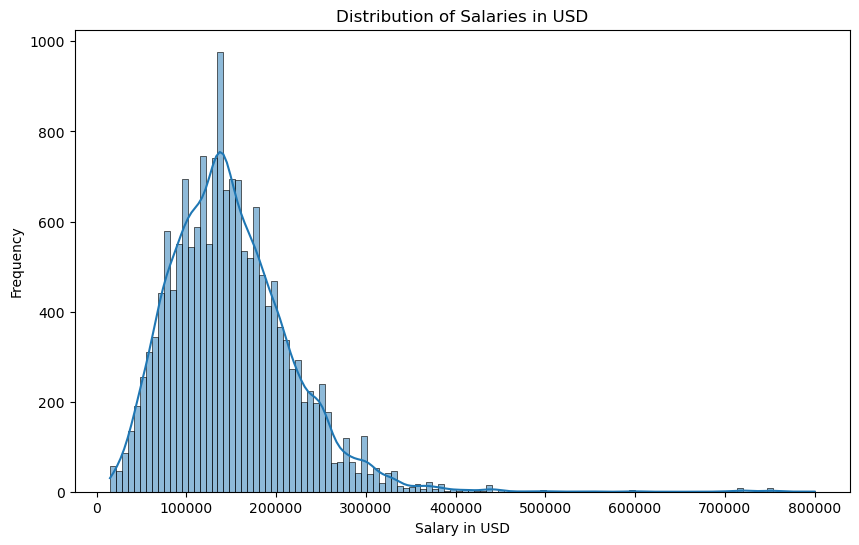

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

2. EXPERIENCE LEVEL DISTRIBUTION


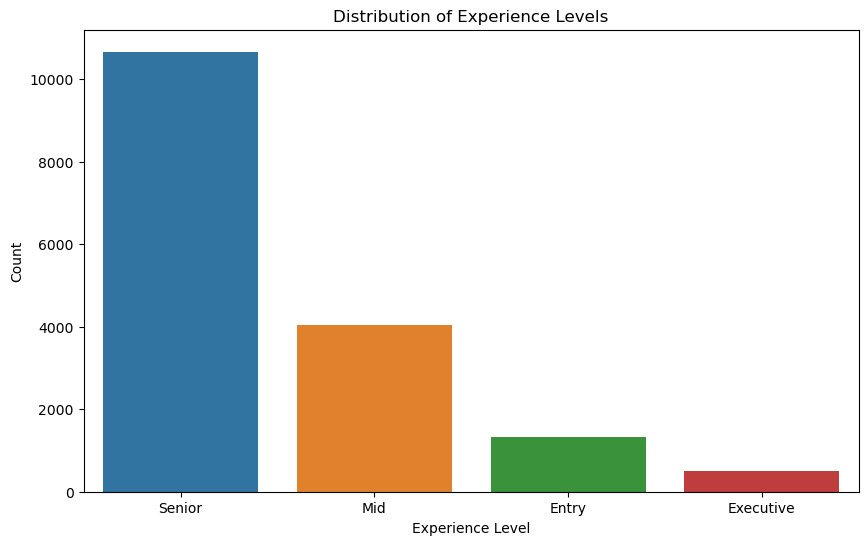

In [ ]:
# Experience level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=jobs, x='experience_level')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


3. EMPLOYMENT TYPE DISTRIBUTION

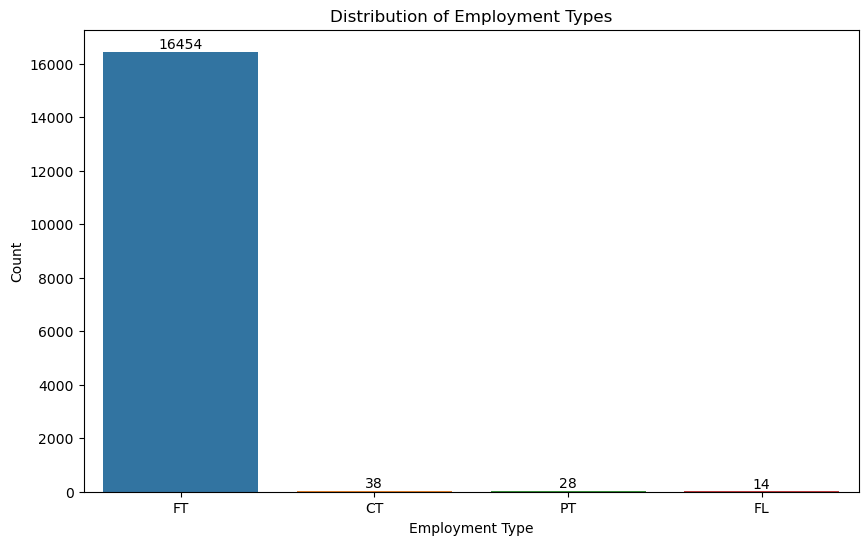

In [35]:
# Employment type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=jobs, x='employment_type')

# Calculate value counts
value_counts = jobs['employment_type'].value_counts()

plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Add value counts above the bars
for i, count in enumerate(value_counts):
    plt.text(i, count + 10, f'{count}', ha='center', va='bottom')

plt.show()



4. SALARY BY JOB TITLE

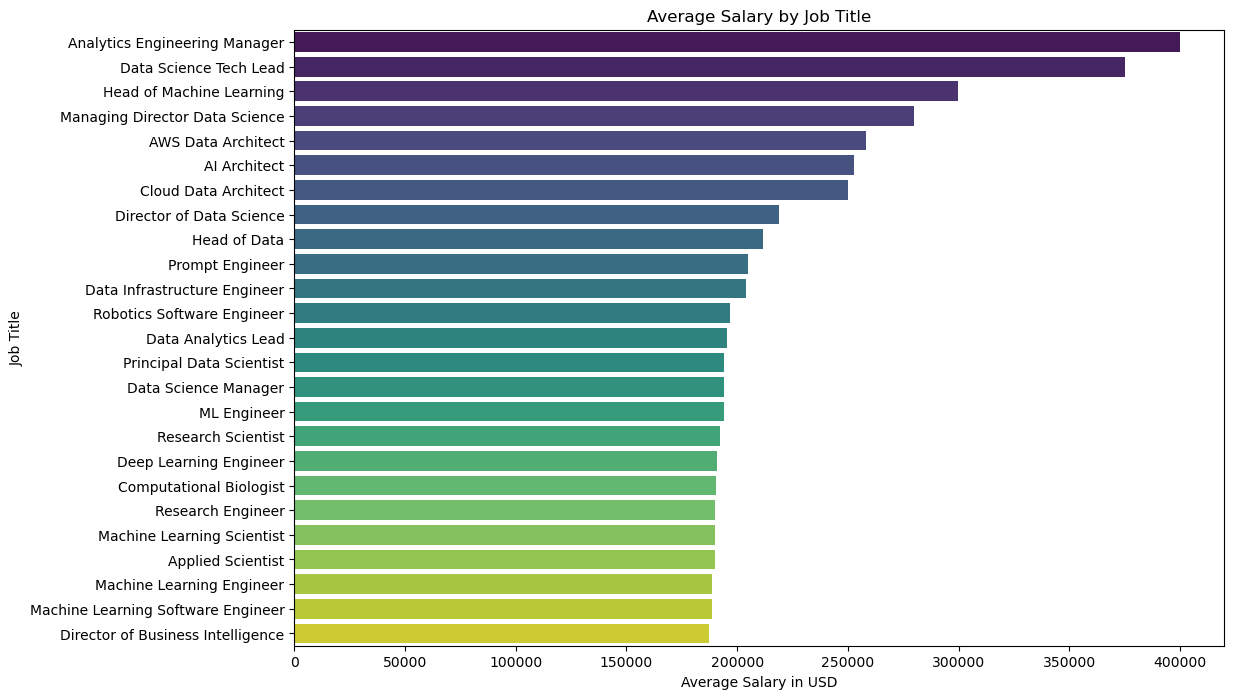

In [43]:
# Average salary by job title
plt.figure(figsize=(12, 8))
avg_salary_by_job = jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(25)
sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='viridis')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()


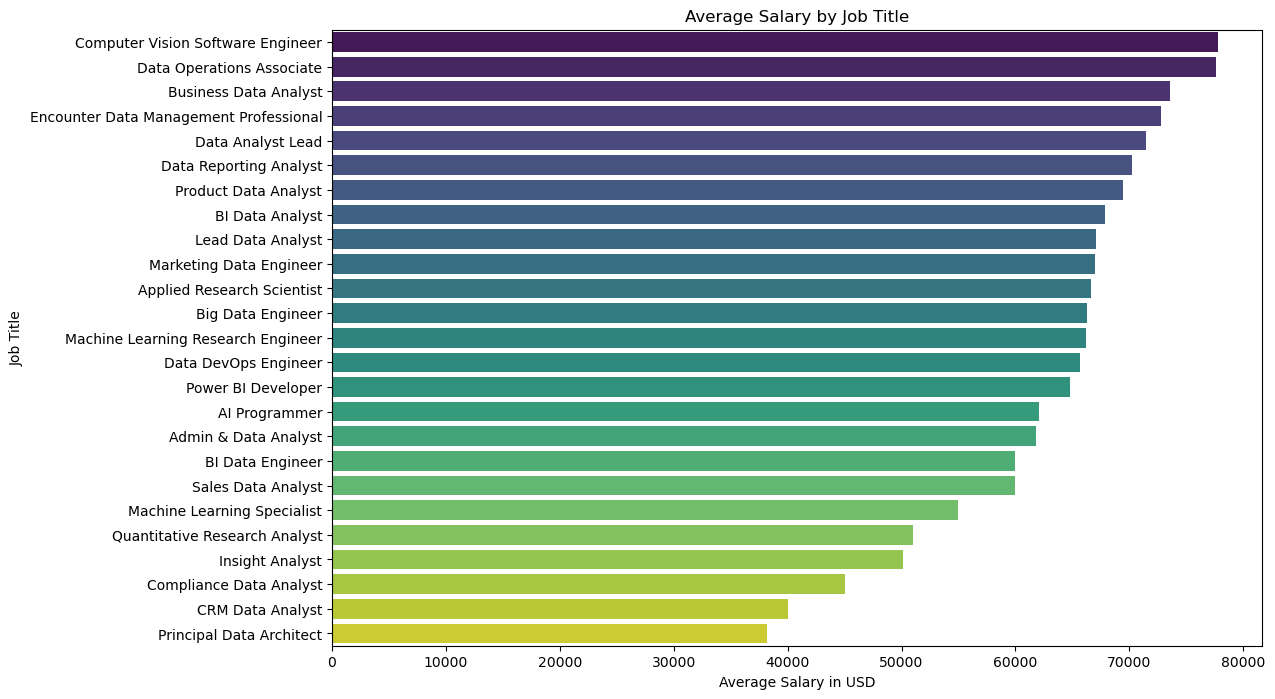

In [44]:
# Average salary by job title
plt.figure(figsize=(12, 8))
avg_salary_by_job = jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).tail(25)
sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='viridis')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

5. Salary by Experience Level

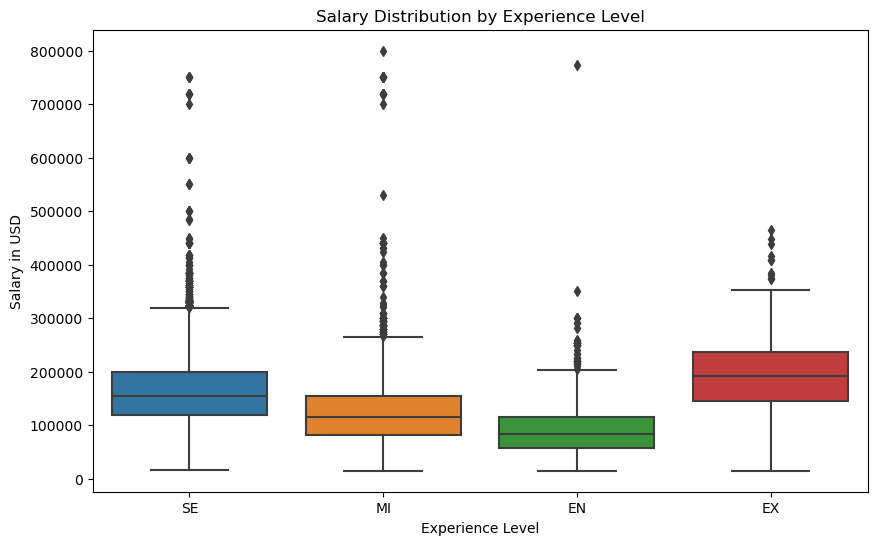

In [47]:
# Salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=jobs, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


6. salary by company size

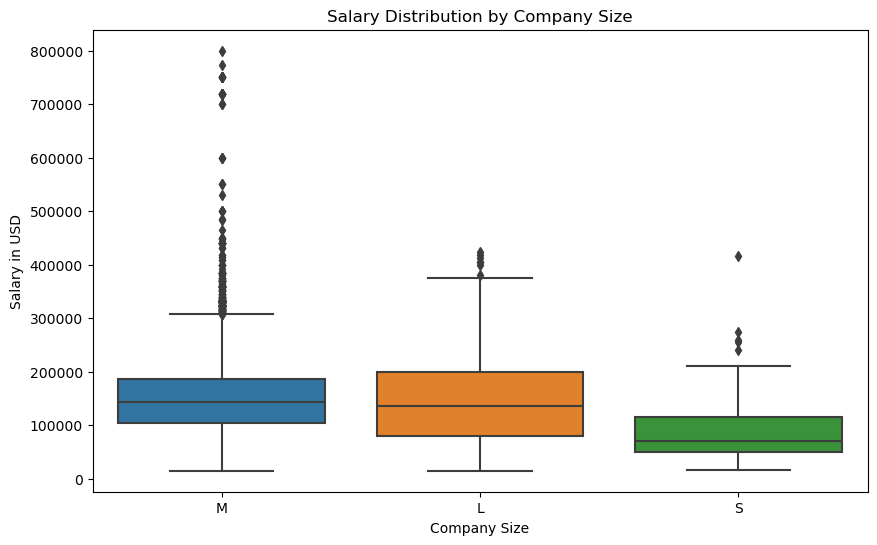

In [48]:
# Salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(data=jobs, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()
